WARNING    The expression "1 / 20" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warning. [brian2.parsing.bast.floating_point_division]
WARNING    The expression "5 / 2" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warning. [

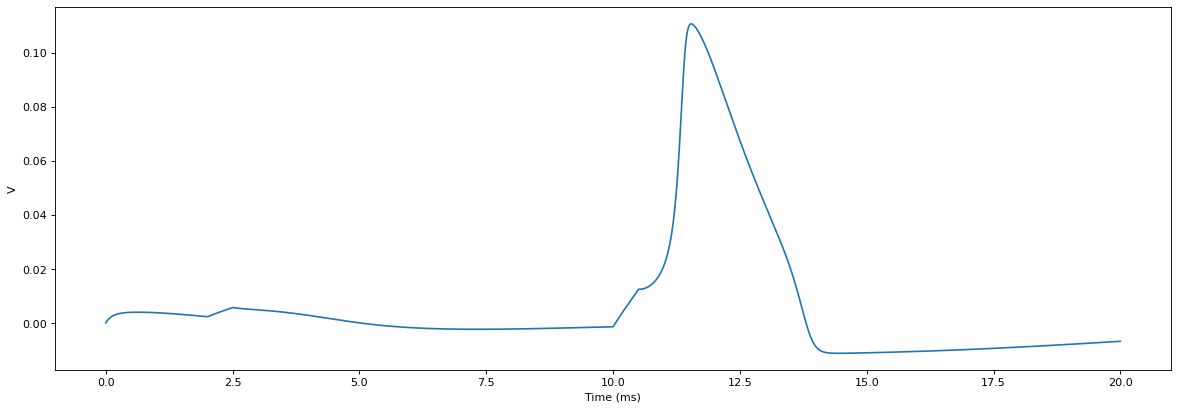

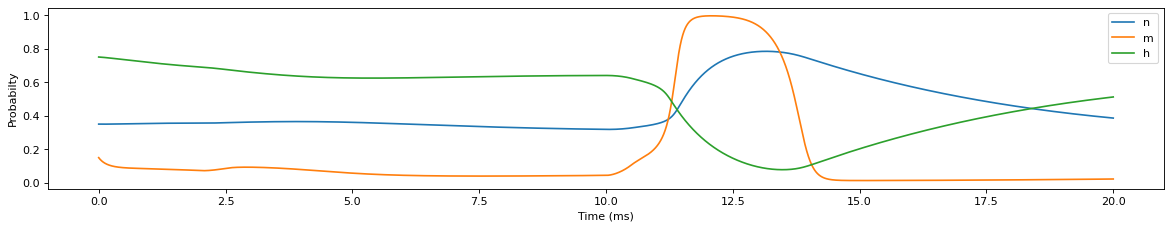

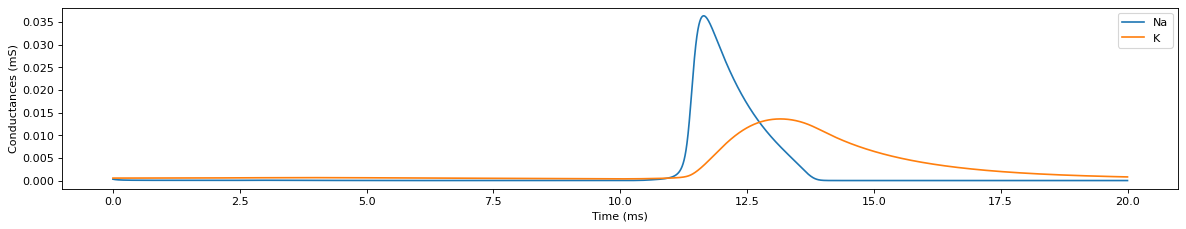

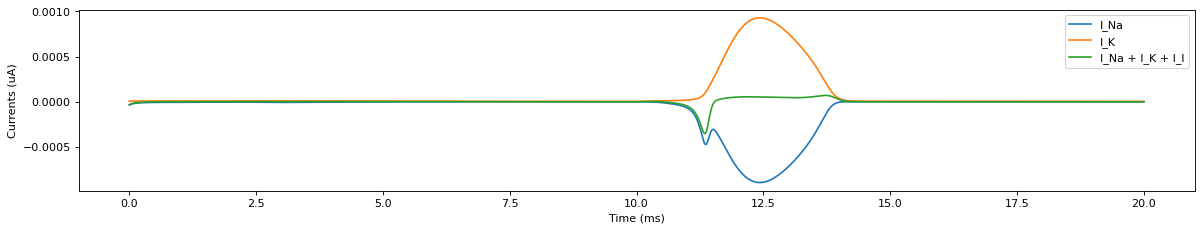

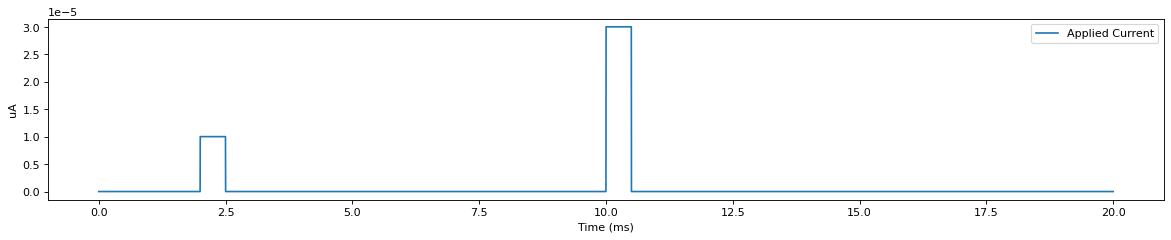

In [1]:
from brian2 import *

%matplotlib inline
defaultclock.dt = 0.001*ms #determining step size for differential equation solver

start_scope()
Cm = 1.0*ufarad
El = 10.6*mV
ENa = 120.0*mV
EK = -12.0*mV
gl0 = 0.3*msiemens
gNa0 = 120.0*msiemens
gK0 = 36.0*msiemens

eqs = '''
dv/dt = (I - gl * (v-El) - gNa * m**3 * h * (v-ENa) - gK * n**4 * (v-EK))/Cm : volt
I : amp (constant) # applied current

dn/dt = alphan * (1-n) - betan * n : 1
dm/dt = alpham * (1-m) - betam * m : 1
dh/dt = alphah * (1-h) - betah * h : 1

alphan = (0.01/mV) * 10*mV/exprel((-v+10*mV)/(10*mV))/ms : Hz
betan = 0.125*exp(-v/(80*mV))/ms : Hz

alpham = (0.1/mV) * 10*mV/exprel((-v+25*mV)/(10*mV))/ms : Hz
betam = 4 * exp(-v/(18*mV))/ms : Hz

alphah = 0.07 * exp(-v/(20*mV))/ms : Hz
betah = 1/(exp((-v+30*mV) / (10*mV)) + 1)/ms : Hz

gNa : siemens
gK : siemens
gl : siemens
'''

HH = NeuronGroup(1, eqs, method='euler')

HH.v = 0.0*mV

HH.h = 0.75
HH.m = 0.15
HH.n = 0.35

HH.gNa = gNa0
HH.gK = gK0
HH.gl = gl0

statemon = StateMonitor(HH, True, record=True)

HH.I = 0.0*uA
run(2*ms)
HH.I = 10.0*uA
run(0.5*ms)
HH.I = 0.0*uA
run(7.5*ms)
HH.I = 30.0*uA
run(0.5*ms)
HH.I = 0.0*uA
run(9.5*ms)

figure(figsize=(18, 6), dpi=80)
plot(statemon.t/ms, statemon.v[0])
xlabel('Time (ms)')
ylabel('V');
show()

figure(figsize=(18, 3), dpi=80)
plot(statemon.t/ms, statemon.n[0], label='n')
plot(statemon.t/ms, statemon.m[0], label='m')
plot(statemon.t/ms, statemon.h[0], label='h')
xlabel('Time (ms)')
ylabel('Probabilty')
legend()
show()

figure(figsize=(18, 3), dpi=80)
plot(statemon.t/ms, statemon.gNa[0]*(statemon.m[0]**3)*statemon.h[0], label='Na')
plot(statemon.t/ms, statemon.gK[0]*(statemon.n[0]**4), label='K')
xlabel('Time (ms)')
ylabel('Conductances (mS)')
legend()
show()

figure(figsize=(18, 3), dpi=80)
plot(statemon.t/ms, statemon.gNa[0]*(statemon.m[0]**3)*statemon.h[0]*(statemon.v[0]-ENa), label='I_Na')
plot(statemon.t/ms, statemon.gK[0]*(statemon.n[0]**4)*(statemon.v[0]-EK), label='I_K')
plot(statemon.t/ms, statemon.gl[0]*(statemon.v[0]-El) + statemon.gK[0]*(statemon.n[0]**4)*(statemon.v[0]-EK) +
     statemon.gNa[0]*(statemon.m[0]**3)*statemon.h[0]*(statemon.v[0]-ENa), label='I_Na + I_K + I_l')
xlabel('Time (ms)')
ylabel('Currents (uA)')
legend()
show()


figure(figsize=(18, 3), dpi=80)
plot(statemon.t/ms, statemon.I[0], label='Applied Current')
xlabel('Time (ms)')
ylabel('uA')
legend()
show()